Importing the dependencies

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics


Datacollection and processing

In [2]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [5]:
#inspecting the first 5 rows of rhe dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [9]:
#get some information about this dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
# checking the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [11]:
 # checking the distribution of the categorial data
 print(car_dataset.Fuel_Type.value_counts())
 print(car_dataset.Seller_Type.value_counts())
 print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorical data

In [13]:
# encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)

# encoding "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)





In [14]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and target

In [16]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [18]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting training and test data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.1, random_state=2)

Model Training

1.Linear Regression

In [25]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [26]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [27]:
#Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [28]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ",error_score)


R squared Error :  0.8799451660493711


Vistualize the actual prices and the predicted prices

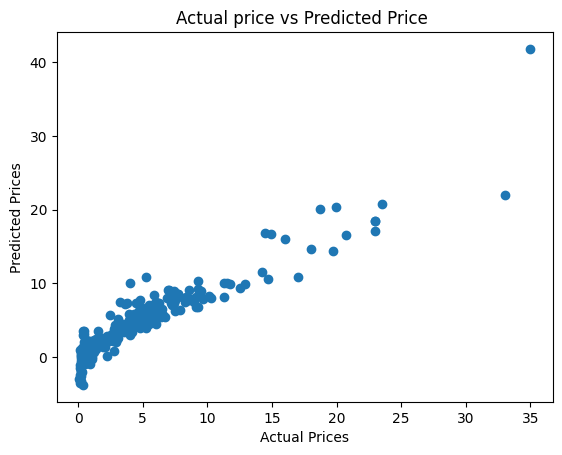

In [29]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted Price ")
plt.show()

In [30]:
#Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [32]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ",error_score)


R squared Error :  0.8365766715027051


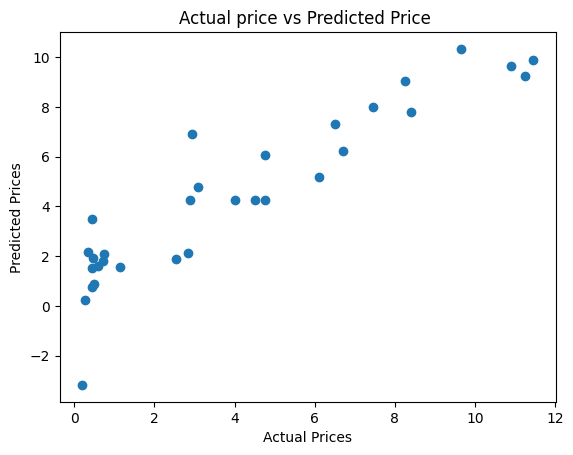

In [33]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted Price ")
plt.show()

Lasso Regerssion

In [44]:
# loading the lasso regression model
las_reg_model = Lasso()

In [35]:
las_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [36]:
#Prediction on training data
training_data_prediction = las_reg_model.predict(X_train)

In [37]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ",error_score)


R squared Error :  0.8427856123435794


Vistualize the actual prices and the predicted prices

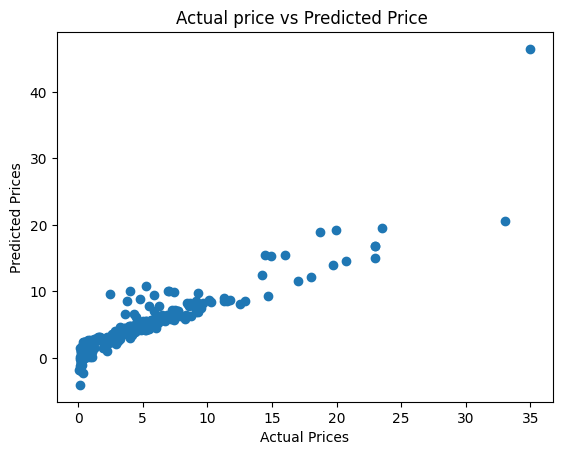

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted Price ")
plt.show()

In [39]:
#Prediction on test data
test_data_prediction = las_reg_model.predict(X_test)

In [40]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ",error_score)


R squared Error :  0.8709167941173195


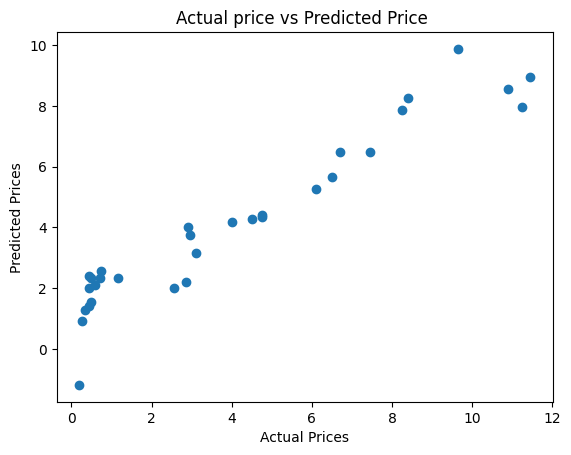

In [41]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted Price ")
plt.show()

XGBRegressor model

In [45]:
# loading the lasso regression model
model = XGBRegressor()

In [46]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [47]:
#Prediction on training data
training_data_prediction = model.predict(X_train)

In [48]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ",error_score)


R squared Error :  0.9999896680984235


Vistualize the actual prices and the predicted prices

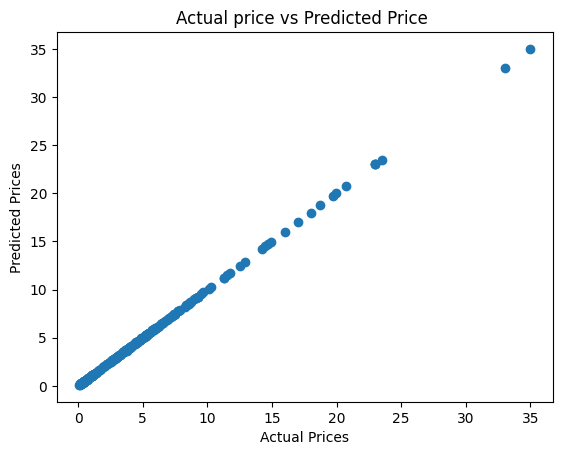

In [49]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted Price ")
plt.show()

In [50]:
#Prediction on test data
test_data_prediction = model.predict(X_test)

In [51]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ",error_score)


R squared Error :  0.9807321370840111


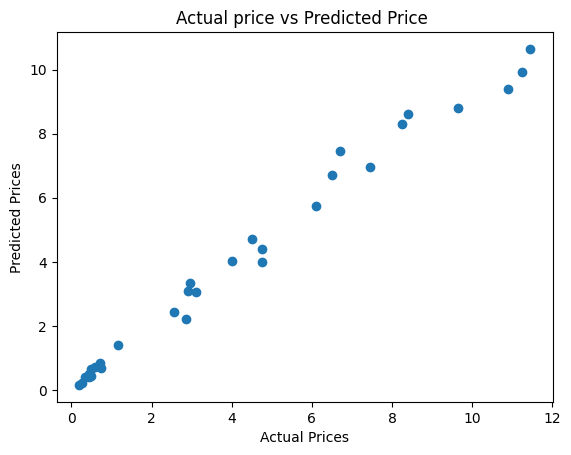

In [52]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price vs Predicted Price ")
plt.show()